# Overview of the Dataset
### Descriptive Analysis (Non-Graphical)

## 📌 Importing Required Libraries

To begin data preprocessing and visualization, we need to import the necessary Python libraries:

- **pandas**: For handling and manipulating structured data.
- **numpy**: For numerical operations and array manipulation.
- **matplotlib.pyplot**: For creating static, animated, and interactive visualizations.
- **seaborn**: For statistical data visualization with attractive, informative graphics.


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 📥 Loading the Winsorized Data  

After handling outliers using **IQR-based Winsorization**, we load the cleaned dataset for further processing.


In [28]:
df = pd.read_csv("winsorized_data.csv")
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,False,24.56,True,False,False,12.5,10,False,Female,50-54,Hispanic,No,True,Good,6,False,False,False
1,False,30.23,False,False,False,0.0,0,False,Female,75-79,White,No,True,Excellent,7,False,False,False
2,False,29.12,True,False,False,0.0,0,False,Female,80 or older,White,No,True,Excellent,7,True,False,False
3,True,30.23,False,False,False,0.0,0,False,Female,80 or older,White,No,True,Very good,8,False,False,False
4,False,20.81,True,False,True,0.0,0,False,Male,65-69,White,No,True,Fair,8,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59063,True,21.93,True,False,False,12.5,0,False,Female,70-74,White,Yes,True,Fair,4,True,False,True
59064,False,24.68,True,False,False,0.0,0,True,Male,80 or older,White,No,True,Very good,6,False,False,True
59065,True,20.38,False,False,False,5.0,4,False,Female,65-69,White,No,True,Good,7,False,False,False
59066,False,25.86,True,False,False,12.5,0,True,Male,65-69,White,No,False,Good,7,False,False,True


## 🛠️ Checking DataFrame Information  

To understand the structure of our dataset, we use the `.info()` method:

In [30]:
df.info

<bound method DataFrame.info of        HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             False  24.56     True            False   False            12.5   
1             False  30.23    False            False   False             0.0   
2             False  29.12     True            False   False             0.0   
3              True  30.23    False            False   False             0.0   
4             False  20.81     True            False    True             0.0   
...             ...    ...      ...              ...     ...             ...   
59063          True  21.93     True            False   False            12.5   
59064         False  24.68     True            False   False             0.0   
59065          True  20.38    False            False   False             5.0   
59066         False  25.86     True            False   False            12.5   
59067          True  26.50    False            False   False             0.0   

       

## Basic Statistics

## 📊 Summary Statistics of the Dataset  

To get a quick statistical summary of the numerical columns, we use the `.describe()` method:


In [36]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,59068.000000,59068.000000,59068.000000,59068.000000
mean,28.402214,3.035611,2.348547,7.109975
std,5.851002,4.835433,3.795432,1.433887
min,13.000000,0.000000,0.000000,3.000000
25%,24.250000,0.000000,0.000000,6.000000
50%,27.460000,0.000000,0.000000,7.000000
75%,31.750000,5.000000,4.000000,8.000000
max,43.000000,12.500000,10.000000,11.000000


## Detailed Statisitcs

## 📊 Univariate Statistical Analysis  

To analyze the dataset's **numerical and categorical** columns, we compute various univariate statistics:

### 🔹 **Numerical Column Statistics**  
For each numerical column, we compute:
- **Count, Min, Max, Mean, Median, Sum**
- **Variance & Standard Deviation** (spread of data)
- **Coefficient of Variation (CV)** (relative variability)
- **Kurtosis & Skewness** (distribution shape)
- **Median Absolute Deviation (MAD)** (robust dispersion measure)
- **Monotonicity** (checks if values increase/decrease consistently)

### 🔹 **Categorical Column Statistics**  
For categorical columns, we calculate:
- **Count**: Number of non-null values
- **Frequency %**: Proportion of unique values
- **Mode**: Most frequently occurring value
- **Monotonicity**: Not applicable to categorical data

### 💾 **Results**  
- The computed statistics are stored in a **DataFrame (`summary_df`)**.
- The results are **saved to `univariate_summary.csv`**.
- A summary is printed for quick inspection.

This helps in understanding the **data distribution, variability, and categorical composition** before further processing.


In [40]:
# Ensure the dataset is a DataFrame
if isinstance(df, pd.Series):
    df = df.to_frame()  # Convert Series to DataFrame

# Function to compute univariate statistics for numerical columns
def compute_numerical_stats(column):
    median_value = column.median()
    mad_value = np.median(np.abs(column - median_value))  # Compute MAD manually
    
    # Check for monotonicity only if data is numeric and sorted
    try:
        monotonicity = column.is_monotonic
    except AttributeError:
        monotonicity = None  # If not applicable

    stats = {
        'Count': column.count(),
        'Min': column.min(),
        'Max': column.max(),
        'Mean': column.mean(),
        'Median': median_value,
        'Sum': column.sum(),
        'Variance': column.var(),
        'Standard Deviation': column.std(),
        'Coefficient of Variation (CV)': (column.std() / column.mean()) * 100 if column.mean() != 0 else None,
        'Kurtosis': column.kurt(),
        'Skewness': column.skew(),
        'Median Absolute Deviation (MAD)': mad_value,
        'Monotonicity': monotonicity,
    }
    return stats

# Function to compute univariate statistics for categorical columns
def compute_categorical_stats(column):
    freq_table = column.value_counts(normalize=True) * 100
    stats = {
        'Count': column.count(),
        'Frequency %': freq_table.to_dict(),
        'Mode': column.mode().iloc[0] if not column.mode().empty else None,
        'Monotonicity': 'N/A',  # Monotonicity doesn't apply to categorical data
    }
    return stats

# Iterate through all columns and compute statistics
results = {}
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:  # Numerical columns
        results[col] = compute_numerical_stats(df[col])
    else:  # Categorical columns
        results[col] = compute_categorical_stats(df[col])

# Convert results to a DataFrame for better readability
summary_df = pd.DataFrame.from_dict(results, orient='index')

# Save the results to a CSV file
summary_df.to_csv('univariate_summary.csv', index=True)

# Print the summary
print(summary_df)


                  Count                                        Frequency %  \
HeartDisease      59068  {False: 53.65849529355996, True: 46.3415047064...   
BMI               59068                                                NaN   
Smoking           59068  {False: 51.24094264237827, True: 48.7590573576...   
AlcoholDrinking   59068  {False: 94.26762375567142, True: 5.73237624432...   
Stroke            59068  {False: 91.1982799485339, True: 8.801720051466...   
PhysicalHealth    59068                                                NaN   
MentalHealth      59068                                                NaN   
DiffWalking       59068  {False: 76.67772736507077, True: 23.3222726349...   
Sex               59068  {'Male': 52.14159951242635, 'Female': 47.85840...   
AgeCategory       59068  {'70-74': 13.228821019841538, '80 or older': 1...   
Race              59068  {'White': 76.74713889076996, 'Hispanic': 9.020...   
Diabetic          59068  {'No': 76.26633710299994, 'Yes': 20.633

## Summarizing Categorical Features

## 🔍 Categorical Column Frequency Distribution  

This script identifies **categorical columns** in the dataset and displays their **frequency distribution**.

### 🔹 **Process**  
- It checks each column's data type:
  - If it's **`object`** (string) or **`category`**, it is treated as categorical.
- It then prints:
  - **Column name**
  - **Frequency distribution** (count of each unique value)

### 📌 **Purpose**  
- Helps in understanding the **distribution of categorical values**.
- Useful for detecting **imbalanced categories**.
- Provides insights before **encoding or feature engineering**.

Each categorical column's frequency distribution is displayed for further analysis.


In [44]:
for column in df.columns:
    if df[column].dtype == 'object' or df[column].dtype.name == 'category':  # Check if the column is categorical
        print(f"Frequency distribution for column '{column}':")
        print(df[column].value_counts())  # Get the frequency distribution
        print("\n")  # Print a new line for readability

Frequency distribution for column 'Sex':
Sex
Male      30799
Female    28269
Name: count, dtype: int64


Frequency distribution for column 'AgeCategory':
AgeCategory
70-74          7814
80 or older    7580
65-69          7388
60-64          6575
75-79          6116
55-59          5050
50-54          3899
45-49          3045
40-44          2589
35-39          2436
30-34          2279
18-24          2269
25-29          2028
Name: count, dtype: int64


Frequency distribution for column 'Race':
Race
White                             45333
Hispanic                           5328
Black                              3870
Other                              1947
American Indian/Alaskan Native     1535
Asian                              1055
Name: count, dtype: int64


Frequency distribution for column 'Diabetic':
Diabetic
No                         45049
Yes                        12188
No, borderline diabetes     1505
Yes (during pregnancy)       326
Name: count, dtype: int64


Frequency distri

## 📊 **Enhanced Univariate Analysis Summary**

This script provides **detailed univariate statistics** for both **numerical and categorical columns**, along with **missing data insights**.

---

### 🔹 **Numerical Data Analysis**  
For each **numerical column**, the script computes:
- **Basic Statistics**: Count, Min, Max, Mean, Median, Sum, Variance, Standard Deviation
- **Outlier Detection**: Using **Interquartile Range (IQR)**
- **Distribution Analysis**: **Shapiro-Wilk Test** for normality
- **Coverage (%)**: Percentage of values within **non-outlier range**
- **Unique Values**: Count of distinct values

---

### 🔹 **Categorical Data Analysis**  
For each **categorical column**, the script computes:
- **Mode**: Most frequently occurring value
- **Frequency Distribution**: Percentage of each category
- **Diversity Check**: Number of **unique categories**
- **Imbalance Detection**: If the difference between highest and lowest frequency **exceeds 50%**

---

### 🔹 **Additional Insights**
- **Missing Data Analysis**:
  - Counts and percentages of **missing values** in each column
- **Data Type Summary**:
  - Count of **different data types** in the dataset

---

### 📌 **Outputs**
- **Detailed summary of all columns**
- **Saved as `enhanced_univariate_summary.csv`**
- **Printed statistics for quick insights**


In [47]:
import pandas as pd
import numpy as np
from scipy import stats as sp_stats  # Renaming the import to avoid conflict

# Ensure the dataset is a DataFrame
if isinstance(df, pd.Series):
    df = df.to_frame()  # Convert Series to DataFrame

# Function to compute univariate statistics for numerical columns
def compute_numerical_stats(column):
    # Outlier detection using IQR
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    
    # Compute coverage and range
    data_range = column.max() - column.min()
    coverage = ((column >= lower_bound) & (column <= upper_bound)).mean() * 100

    # Unique values
    unique_values = column.nunique()
    
    stats = {
        'Count': column.count(),
        'Min': column.min(),
        'Max': column.max(),
        'Mean': column.mean(),
        'Median': column.median(),
        'Sum': column.sum(),
        'Variance': column.var(),
        'Standard Deviation': column.std(),
        'Outliers Count': outliers.count(),
        'Range': data_range,
        'Coverage (%)': coverage,
        'Unique Values': unique_values,  # Number of unique values
    }
    
    # Shapiro-Wilk test for normality
    shapiro_stat, shapiro_p_value = sp_stats.shapiro(column.dropna())  # Using sp_stats to avoid conflict
    stats['Shapiro-Wilk p-value'] = shapiro_p_value
    
    return stats

# Function to compute univariate statistics for categorical columns
def compute_categorical_stats(column):
    # Frequency percentages
    freq_table = column.value_counts(normalize=True) * 100
    mode_value = column.mode().iloc[0] if not column.mode().empty else None
    
    # Categorical column diversity and imbalanced check
    unique_values = column.unique()  # Unique values in the column
    unique_categories = len(unique_values)
    imbalance = (freq_table.max() - freq_table.min()) > 50  # Imbalance if difference > 50%

    stats = {
        'Count': column.count(),
        'Mode': mode_value,
        'Frequency %': freq_table.to_dict(),
        'Unique Categories': unique_categories,
        'Unique Values': unique_values,  # List of unique values
        'Imbalance': imbalance,
    }

    return stats

# Function to check missing data
def check_missing_data(df):
    missing_data = df.isnull().sum()
    missing_percentage = (missing_data / len(df)) * 100
    missing_summary = pd.DataFrame({
        'Missing Data Count': missing_data,
        'Missing Data Percentage (%)': missing_percentage
    })
    return missing_summary

# Data type summary
def data_type_summary(df):
    data_types = df.dtypes.value_counts()
    return data_types

# Iterate through all columns and compute statistics
results = {}
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:  # Numerical columns
        results[col] = compute_numerical_stats(df[col])
    else:  # Categorical columns
        results[col] = compute_categorical_stats(df[col])

# Convert results to a DataFrame for better readability
summary_df = pd.DataFrame.from_dict(results, orient='index')

# Check for missing data and data types
missing_data_summary = check_missing_data(df)
data_types_summary = data_type_summary(df)

# Combine all summaries into one
summary_df = pd.concat([summary_df, missing_data_summary], axis=1, sort=False)

# Save the results to a CSV file
summary_df.to_csv('enhanced_univariate_summary.csv', index=True)

# Print the summary
print("Univariate Analysis Summary:")
print(summary_df)

print("\nMissing Data Summary:")
print(missing_data_summary)

print("\nData Type Summary:")
print(data_types_summary)


Univariate Analysis Summary:
                  Count   Mode  \
HeartDisease      59068  False   
BMI               59068    NaN   
Smoking           59068  False   
AlcoholDrinking   59068  False   
Stroke            59068  False   
PhysicalHealth    59068    NaN   
MentalHealth      59068    NaN   
DiffWalking       59068  False   
Sex               59068   Male   
AgeCategory       59068  70-74   
Race              59068  White   
Diabetic          59068     No   
PhysicalActivity  59068   True   
GenHealth         59068   Good   
SleepTime         59068    NaN   
Asthma            59068  False   
KidneyDisease     59068  False   
SkinCancer        59068  False   

                                                        Frequency %  \
HeartDisease      {False: 53.65849529355996, True: 46.3415047064...   
BMI                                                             NaN   
Smoking           {False: 51.24094264237827, True: 48.7590573576...   
AlcoholDrinking   {False: 94.26762375567

C:\Users\sumai\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 59068.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\sumai\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 59068.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\sumai\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 59068.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\sumai\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 59068.
  res = hypotest_fun_out(*samples, **kwds)


# Graphical Analysis

### Distribution of Numerical Variables

## 📊 Histogram of BMI

<Axes: xlabel='BMI', ylabel='Count'>

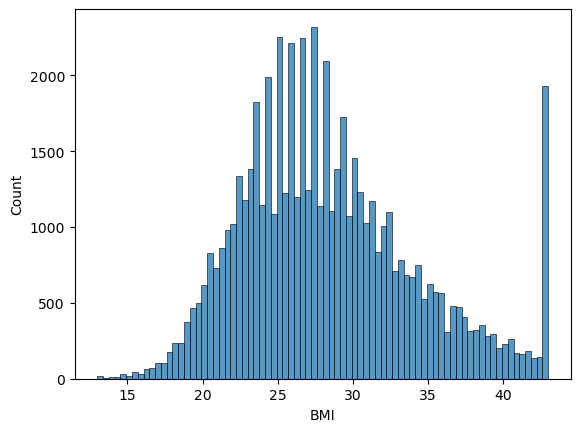

In [52]:
sns.histplot(df['BMI'])

## 📊 Histogram of Physical Health

<Axes: xlabel='PhysicalHealth', ylabel='Count'>

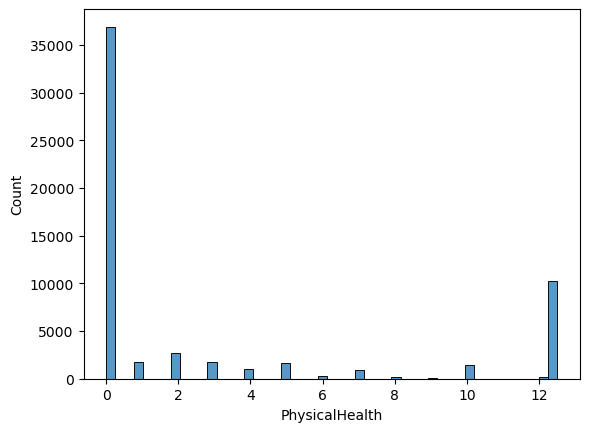

In [55]:
sns.histplot(df['PhysicalHealth'])

## 📊 Histogram of Mental Health

<Axes: xlabel='MentalHealth', ylabel='Count'>

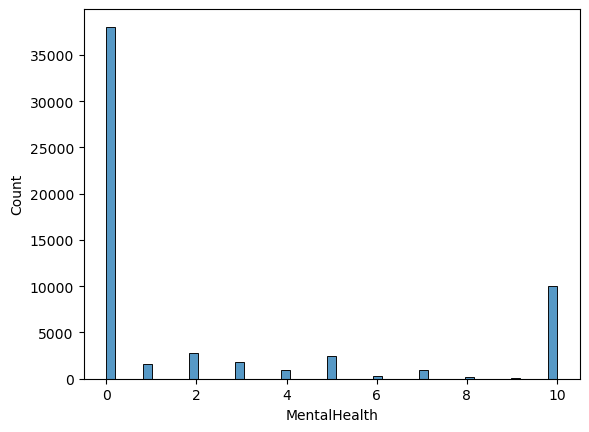

In [58]:
sns.histplot(df['MentalHealth'])

## 📊 Histogram of Sleep Time

<Axes: xlabel='SleepTime', ylabel='Count'>

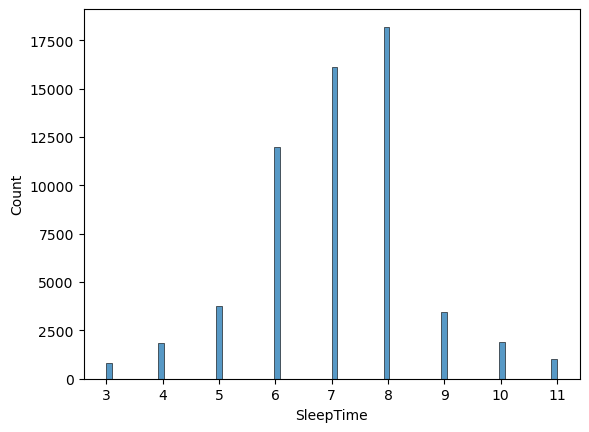

In [61]:
sns.histplot(df['SleepTime'])

### Bar Plots for Categorical Variables

_Visualize the frequency of each category using bar plots_

## 📊 Bar Plot of Sex Distribution

<Axes: xlabel='Sex'>

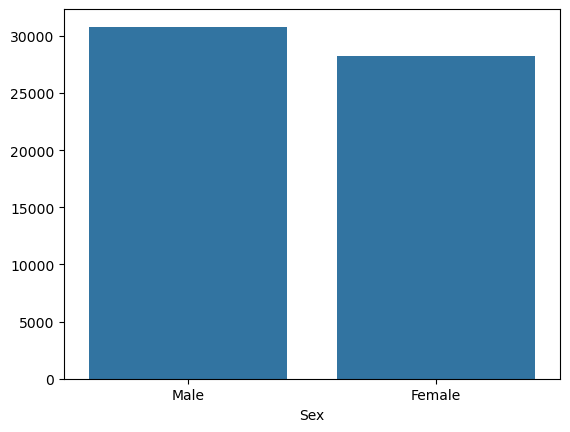

In [66]:
sns.barplot(x=df['Sex'].value_counts().index, y=df['Sex'].value_counts().values)

## 📊 Bar Plot of AgeCategory Distribution

<Axes: xlabel='AgeCategory'>

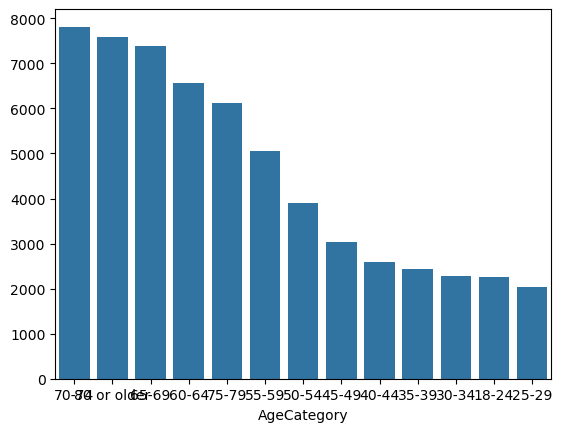

In [69]:
sns.barplot(x=df['AgeCategory'].value_counts().index, y=df['AgeCategory'].value_counts().values)

## 📊 Bar Plot of Race Distribution

<Axes: xlabel='Race'>

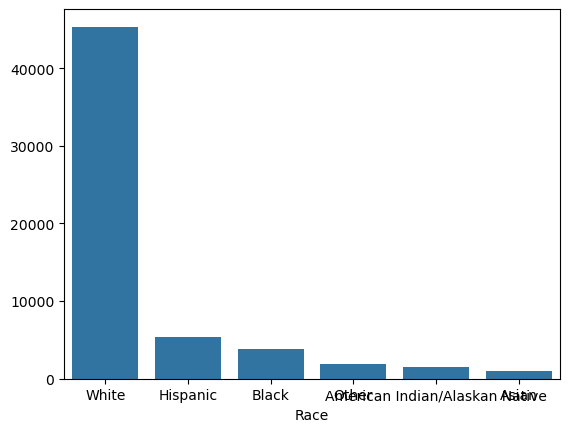

In [72]:
sns.barplot(x=df['Race'].value_counts().index, y=df['Race'].value_counts().values)

## 📊 Bar Plot of GenHealth Distribution

<Axes: xlabel='GenHealth'>

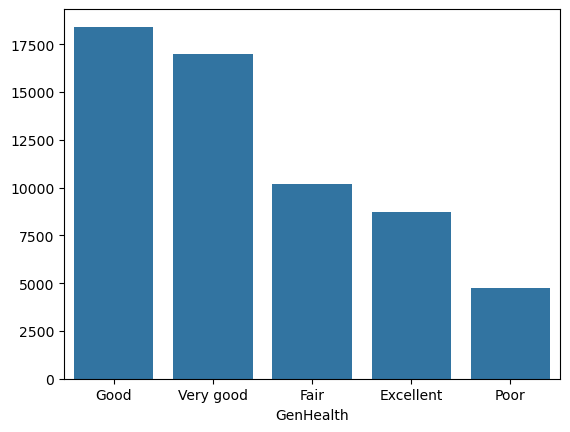

In [75]:
sns.barplot(x=df['GenHealth'].value_counts().index, y=df['GenHealth'].value_counts().values)

# Target Variable Analysis
## Descriptive Analysis


### Summary of the Target Variable:
_For regression: Summarize using (mean, median, min, max, etc.)_


In [79]:
df['Diabetic'].describe()

count     59068
unique        4
top          No
freq      45049
Name: Diabetic, dtype: object

_For classification: Use  to check class distribution_

In [82]:
# Univariate analysis on the 'Diabetic' column
diabetic_counts = df['Diabetic'].value_counts()  # Counts of each category
diabetic_percentage = df['Diabetic'].value_counts(normalize=True) * 100  # Percentage of each category

print("Counts of Diabetes Categories:")
print(diabetic_counts)

print("\nPercentage of Each Category:")
print(diabetic_percentage)


Counts of Diabetes Categories:
Diabetic
No                         45049
Yes                        12188
No, borderline diabetes     1505
Yes (during pregnancy)       326
Name: count, dtype: int64

Percentage of Each Category:
Diabetic
No                         76.266337
Yes                        20.633846
No, borderline diabetes     2.547911
Yes (during pregnancy)      0.551906
Name: proportion, dtype: float64


# Graphical Analysis
## Distribution of Target:


<Axes: xlabel='Diabetic', ylabel='Count'>

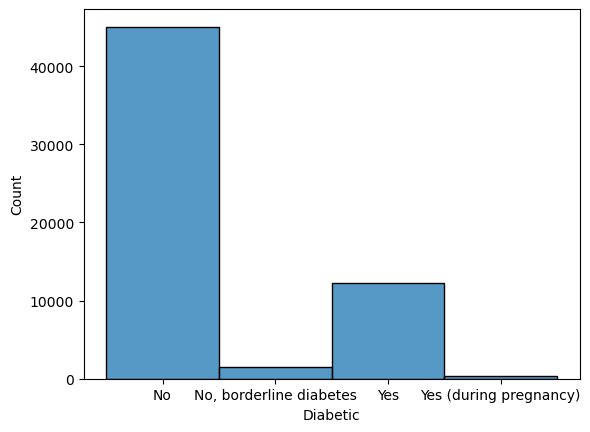

In [85]:
sns.histplot(df['Diabetic'])

+ _Used histograms for regression targets_

<Axes: xlabel='Diabetic', ylabel='count'>

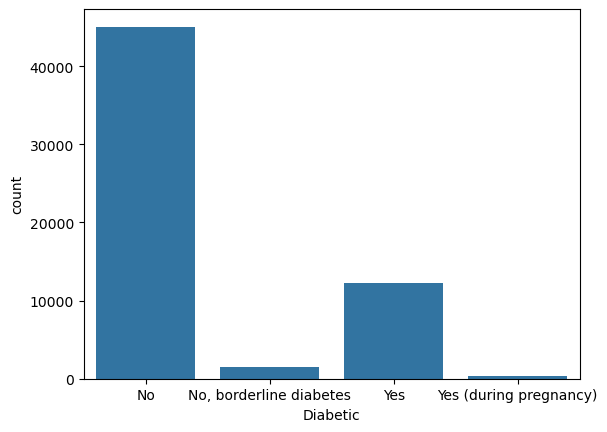

In [88]:
sns.countplot(x='Diabetic', data=df)

_For classification, visualized the target variable distribution using a bar plot_

## Relationship with Predictors:
_Scatter Plot (for regression targets): Visualize relationships between the target and predictors_

<Axes: xlabel='BMI', ylabel='Diabetic'>

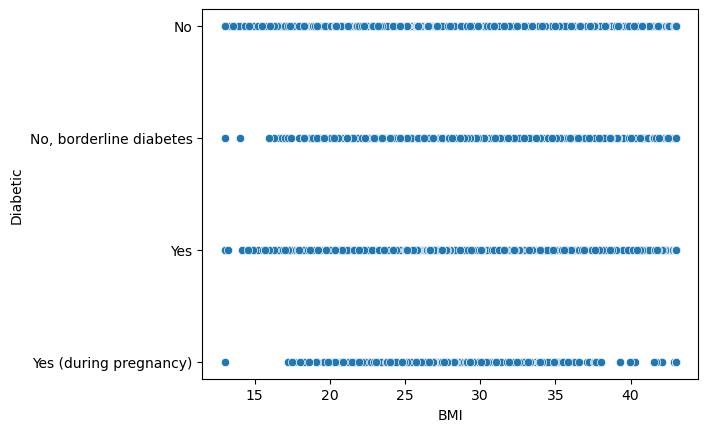

In [92]:
sns.scatterplot(x='BMI', y='Diabetic', data=df)

# Visualizations
### Univariate Graphical Analysis

## Histograms:
_Plot histograms for each continuous variable to observe the distribution_



<Axes: xlabel='BMI', ylabel='Count'>

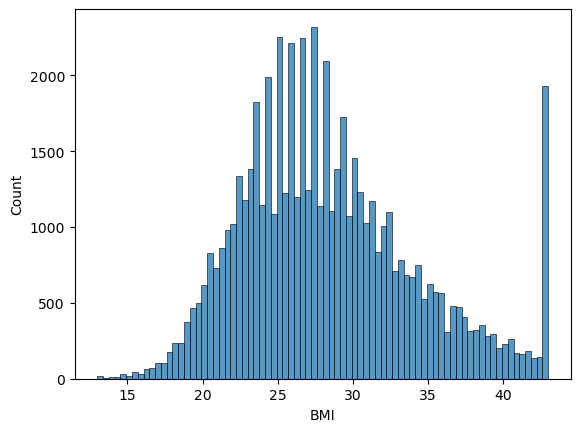

In [145]:
sns.histplot(df['BMI'])

<Axes: xlabel='PhysicalHealth', ylabel='Count'>

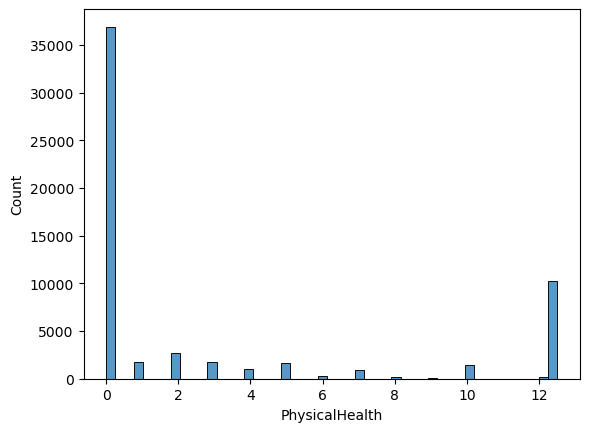

In [150]:
sns.histplot(df['PhysicalHealth'])

<Axes: xlabel='SleepTime', ylabel='Count'>

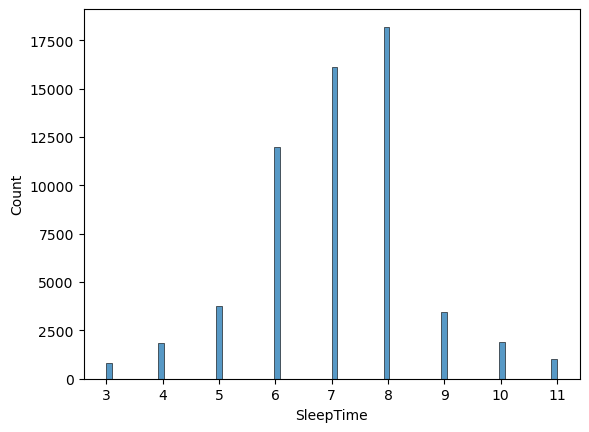

In [152]:
sns.histplot(df['SleepTime'])

<Axes: xlabel='MentalHealth', ylabel='Count'>

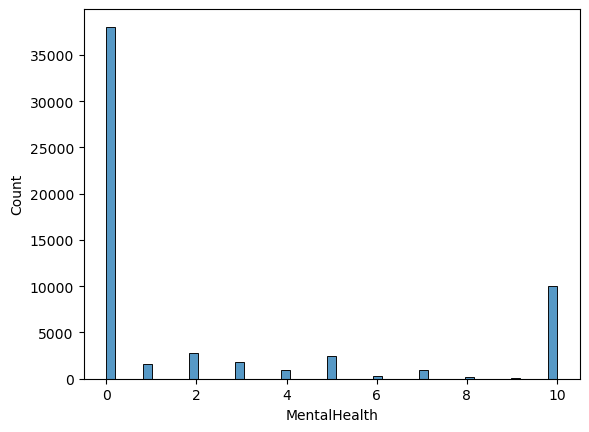

In [154]:
sns.histplot(df['MentalHealth'])

## Box Plots:
_Use box plots to visualize the spread and outliers for continuous features_

<Axes: xlabel='BMI'>

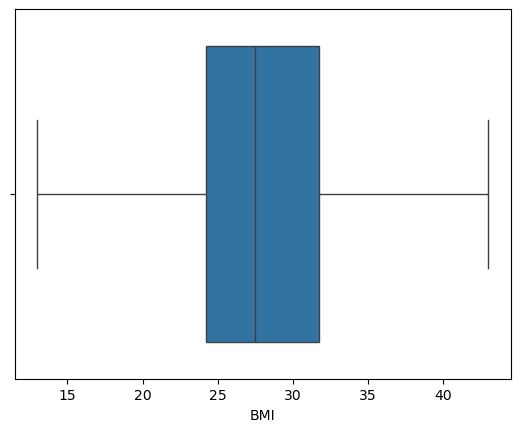

In [156]:
sns.boxplot(x=df['BMI'])

<Axes: xlabel='SleepTime'>

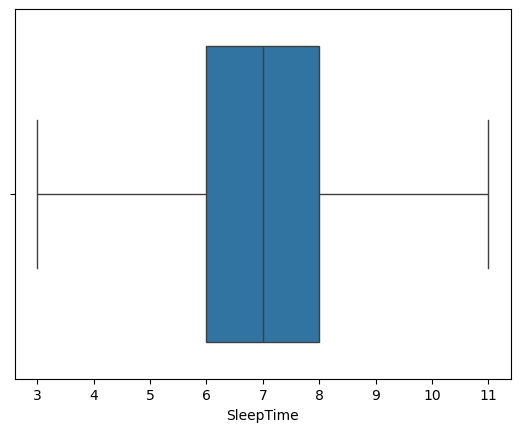

In [158]:
sns.boxplot(x=df['SleepTime'])

<Axes: xlabel='MentalHealth'>

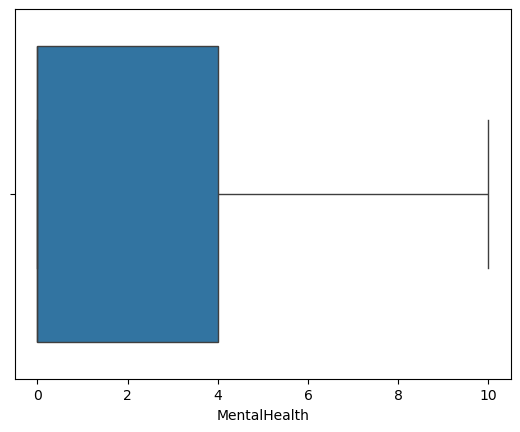

In [160]:
sns.boxplot(x=df['MentalHealth'])

<Axes: xlabel='PhysicalHealth'>

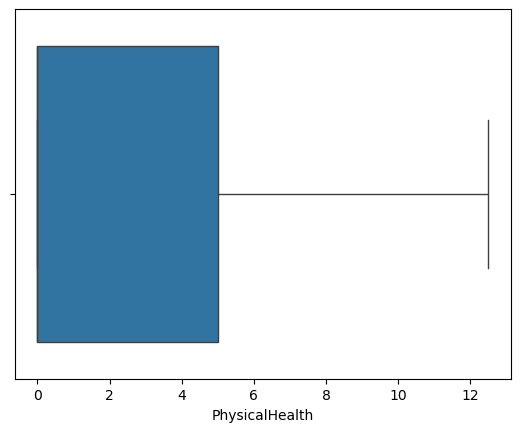

In [162]:
sns.boxplot(x=df['PhysicalHealth'])


# 📊 Data Visualization: Categorical Column Distribution  

## 📌 Overview  
This script visualizes the distribution of categorical columns using **pie charts** and **bar plots** for better insights.  

### 🟠 Pie Charts (≤6 Categories)  
- The first 6 categorical columns with **≤6 unique categories** are displayed as **pie charts**.  
- Uses Seaborn's **"RdPu"** palette for aesthetics.  
- **Labels are positioned outside** with annotations to avoid overlap.  
- **Dynamic colors** are assigned based on the number of categories.  

### 🔵 Bar Charts (>6 Categories)  
- The remaining categorical columns are visualized using **bar plots**.  
- Uses Seaborn's **"Set3"** palette for distinct colors.  
- **Gridlines are removed** for a cleaner look.

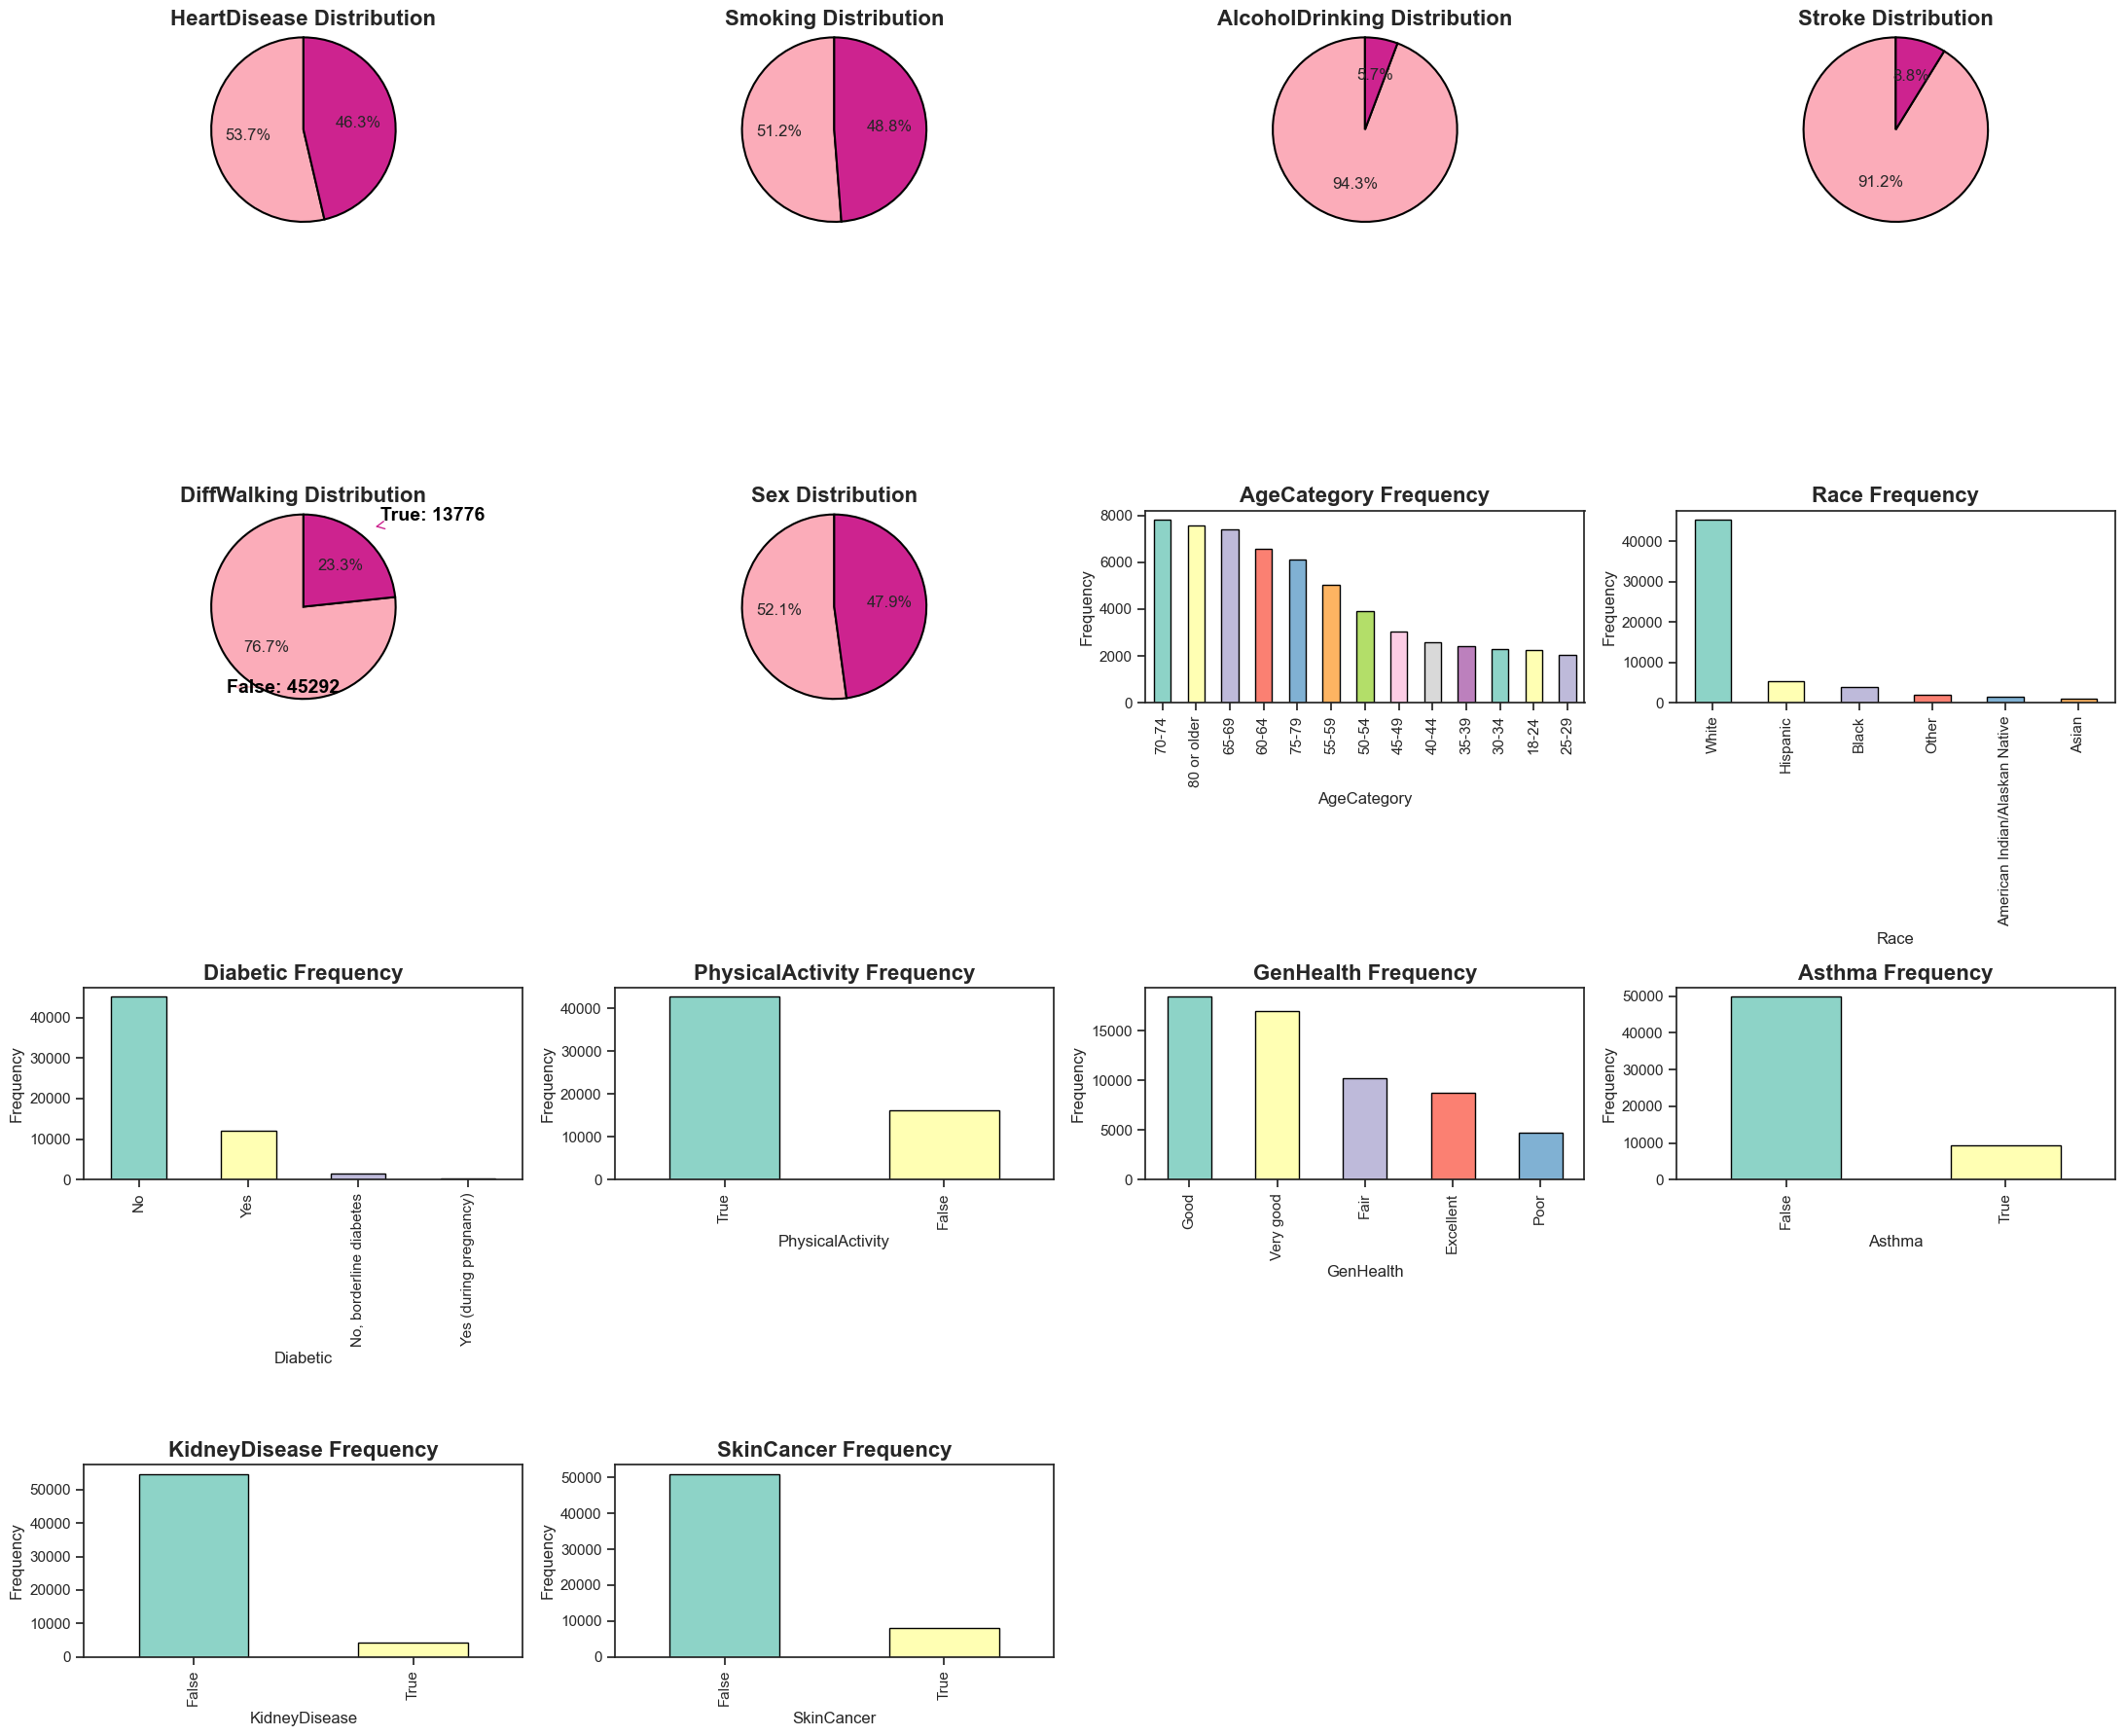

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set Seaborn theme and palette
sns.set_theme(style="ticks", palette="RdPu", rc={"axes.grid": False})  # Ticks style and RdPu palette

# Define the categorical columns and numerical columns
categorical_columns = [
    'HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
    'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 
    'Asthma', 'KidneyDisease', 'SkinCancer'
]
numerical_columns = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

# Create a figure with a larger space for pie charts
plt.figure(figsize=(22, 18))  # Increased size for better clarity

# 1. Categorical Columns - Pie Charts for columns with <= 6 categories
for i, col in enumerate(categorical_columns[:6], start=1):  # First 6 for Pie Charts
    plt.subplot(4, 4, i)  # Use a 4x4 grid for larger pie charts (4 rows, 4 columns)
    
    # Get value counts and filter out small categories (with very low frequency)
    data = df[col].value_counts()
    if len(data) <= 6:  # Only plot pie if <= 6 categories
        # Use Seaborn's color palette dynamically based on the number of categories
        colors = sns.color_palette("RdPu", len(data))  # Dynamic color palette
        
        # Plot the pie chart with larger radius for better clarity
        wedges, texts, autotexts = plt.pie(data, autopct='%1.1f%%', startangle=90, 
                                           colors=colors,  # Dynamic colors based on number of categories
                                           wedgeprops=dict(edgecolor='black', linewidth=1.5), radius=1.2)
        
        # Move labels outside the pie chart using connectors
        for text in texts:
            text.set_position((1.3, 0.2))  # Adjust position to move the label further outside
            text.set_fontsize(14)  # Increase font size for readability
            text.set_fontweight('bold')  # Make labels bold for better emphasis

        # Adjust angle and place annotations without overlap
        for i, wedge in enumerate(wedges):
            angle = (wedge.theta2 + wedge.theta1) / 2
            x = 1.4 * np.cos(np.radians(angle))  # Further adjust the distance from the center
            y = 1.4 * np.sin(np.radians(angle))

            # Calculate dynamic offset to avoid overlap
            offset_x = 1.5 * np.cos(np.radians(angle))
            offset_y = 1.5 * np.sin(np.radians(angle))
            
            # Adjust annotation position based on the angle
            plt.annotate(f'{data.index[i]}: {data.iloc[i]}', xy=(x, y), xytext=(offset_x, offset_y),
                         arrowprops=dict(arrowstyle="->", color=colors[i]),
                         fontsize=14, color='black', weight='bold')
        
        plt.title(f'{col} Distribution', fontsize=16, weight='bold', ha='center')
        plt.ylabel('')  # Hide the ylabel for pie chart
        plt.grid(False)  # Remove gridlines
        plt.tight_layout()

# 2. Categorical Columns - Bar Charts for the remaining categorical columns
for i, col in enumerate(categorical_columns[6:], start=7):  # Remaining categorical columns for Bar Charts
    plt.subplot(4, 4, i)  # Use a 4x4 grid for bar charts
    
    # Plot bar chart for categorical columns
    df[col].value_counts().plot(kind='bar', color=sns.color_palette("Set3", 10), edgecolor='black')
    
    plt.title(f'{col} Frequency', fontsize=16, weight='bold', ha='center')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(False)  # Remove gridlines
    plt.tight_layout()

# Display the plots
plt.show()


# Multivariate nongraphical

# 🔬 Statistical Analysis: Chi-Square Test for Independence  

## 📌 Overview  
The **Chi-Square test** is used to determine whether there is a significant association between two categorical variables. Here, we are testing the relationship between **Diabetic** and **Smoking**.


In [217]:
from scipy.stats import chi2_contingency

# Chi-Square test for Diabetic and Smoking
diabetic_smoking_ct = pd.crosstab(df['Diabetic'], df['Smoking'])
chi2, p, dof, expected = chi2_contingency(diabetic_smoking_ct)

print("Chi-Square Test for Independence between Diabetic and Smoking:")
print(f"Chi2 Value: {chi2}, p-value: {p}")


Chi-Square Test for Independence between Diabetic and Smoking:
Chi2 Value: 343.85158820264667, p-value: 3.198596579940424e-74


### 📌 Interpretation  
- The **p-value (3.20 × 10⁻⁷⁴)** is extremely small (**< 0.05**), leading us to **reject the null hypothesis**.  
- This suggests a **statistically significant relationship** between **Diabetic status and Smoking**.  
- In other words, smoking behavior is **not independent** of diabetes, indicating a possible association.

----
### 📊 One-Way ANOVA: Comparing Physical Health Across Diabetic Categories  

One-way ANOVA (Analysis of Variance) is a statistical test used to determine whether there are significant differences between the means of multiple groups. In this case, we are applying ANOVA to compare the **PhysicalHealth** variable across different **Diabetic** categories (Yes vs. No).  

#### 🔹 Methodology:
- The dataset is divided into two groups based on the **Diabetic** variable.
- The **PhysicalHealth** values for each group are extracted.
- The `f_oneway` function from `scipy.stats` is used to perform the ANOVA test.
- The test results include:
  - **F-Statistic**: Measures the variance between groups relative to variance within groups.
  - **p-value**: Determines the statistical significance of the differences.
    

- A low p-value (typically < 0.05) suggests a significant difference in PhysicalHealth between diabetic and non-diabetic individuals.
- A high p-value (> 0.05) indicates no significant difference between the groups.

This analysis helps in understanding whether diabetes status has a significant impact on physical health.


In [219]:
from scipy.stats import f_oneway

# ANOVA to compare PhysicalHealth based on Diabetic (Yes vs No)
diabetic_groups = [df[df['Diabetic'] == category]['PhysicalHealth'] for category in df['Diabetic'].unique()]
anova_result = f_oneway(*diabetic_groups)

print("ANOVA result for PhysicalHealth across Diabetic categories:")
print(f"F-Statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")


ANOVA result for PhysicalHealth across Diabetic categories:
F-Statistic: 777.5900375569707, p-value: 0.0


### 📌 Interpretation:  
Since the p-value is **0.0 (< 0.05)**, the ANOVA test suggests a **statistically significant difference** in PhysicalHealth between diabetic and non-diabetic individuals. 🚀  


----
# 📊 Pivot Table for Summarizing BMI by Diabetic Status  

This pivot table calculates the **mean BMI** for individuals based on their **Diabetic status**. It helps in understanding whether there is a noticeable difference in BMI between diabetic and non-diabetic individuals. 🚀  


In [221]:
# Pivot table for summarizing BMI by Diabetic status
pivot_table_diabetic = df.pivot_table(values='BMI', index='Diabetic', aggfunc='mean')
print("Pivot Table for BMI by Diabetic status:")
print(pivot_table_diabetic)


Pivot Table for BMI by Diabetic status:
                               BMI
Diabetic                          
No                       27.582951
No, borderline diabetes  30.195674
Yes                      31.213425
Yes (during pregnancy)   28.232730


### 📊 Interpretation: Pivot Table for BMI by Diabetic Status  

The pivot table reveals the **average BMI** for different diabetic categories:  

- **Non-Diabetic:** 27.58  
- **Borderline Diabetes:** 30.20  
- **Diabetic:** 31.21  
- **Gestational Diabetes (During Pregnancy):** 28.23  

Individuals with diabetes tend to have a **higher average BMI** compared to non-diabetics, indicating a potential correlation between BMI and diabetes. 🚀  

---

# 📊 Cross-tabulation: Diabetic vs. Heart Disease  

The cross-tabulation displays the relationship between **Diabetic Status** and **Heart Disease** occurrence:  


In [223]:
# Cross-tabulation between Diabetic and HeartDisease
diabetic_heart_disease_ct = pd.crosstab(df['Diabetic'], df['HeartDisease'], margins=True, margins_name="Total")
print("Cross-tabulation between Diabetic and HeartDisease:")
print(diabetic_heart_disease_ct)


Cross-tabulation between Diabetic and HeartDisease:
HeartDisease             False   True  Total
Diabetic                                    
No                       27530  17519  45049
No, borderline diabetes    716    789   1505
Yes                       3231   8957  12188
Yes (during pregnancy)     218    108    326
Total                    31695  27373  59068


### 🔍 **Observation:**
A higher percentage of **diabetic individuals** have **heart disease** compared to non-diabetics, suggesting a possible association between diabetes and heart disease risk. 🚀 

----

## Multivariate Graphical Analysis


## Scatter Plots
_Visualize the relationship between two continuous features_

<Axes: xlabel='BMI', ylabel='MentalHealth'>

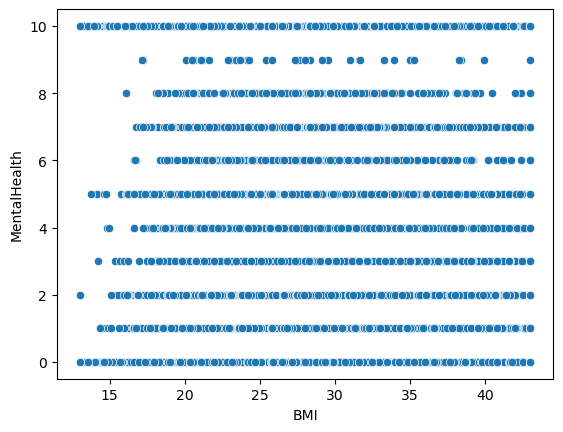

In [166]:
sns.scatterplot(x='BMI', y='MentalHealth', data=df)

<Axes: xlabel='PhysicalHealth', ylabel='MentalHealth'>

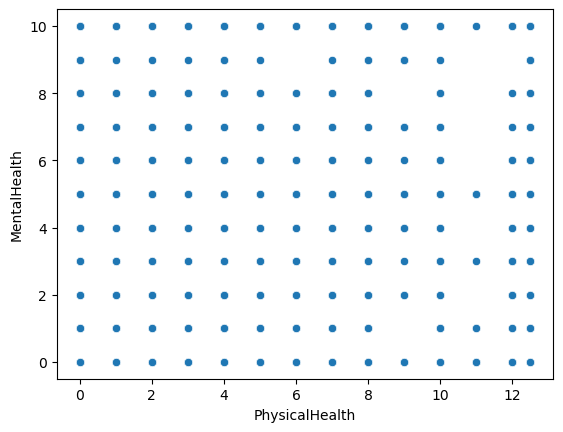

In [168]:
sns.scatterplot(x='PhysicalHealth', y='MentalHealth', data=df)

<Axes: xlabel='BMI', ylabel='PhysicalHealth'>

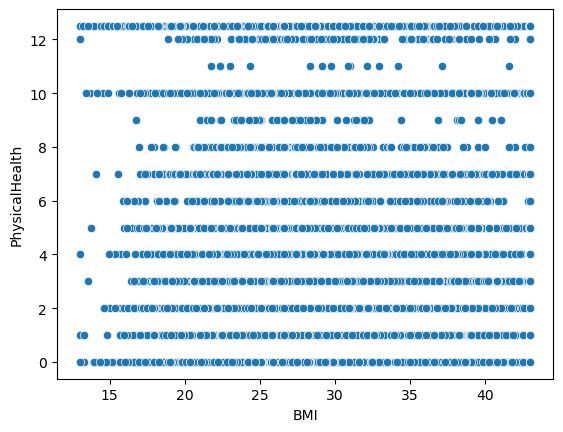

In [172]:
sns.scatterplot(x='BMI', y='PhysicalHealth', data=df)

<Axes: xlabel='MentalHealth', ylabel='SleepTime'>

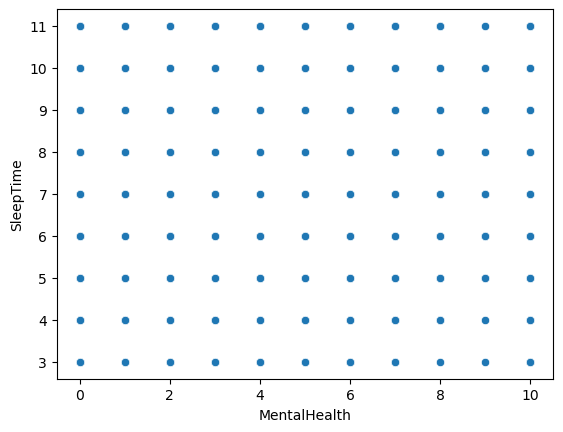

In [176]:
sns.scatterplot(x='MentalHealth', y='SleepTime', data=df)

# Numerical Analysis

## 📈 KDE Plot: Distribution of Diabetes Status by Numerical Features  

This visualization uses **Kernel Density Estimation (KDE) plots** to compare the distributions of **BMI, SleepTime, PhysicalHealth, and MentalHealth** across different **diabetic statuses**.  

### 🔹 Key Details:
- **Four Diabetes Classes:** No, No Borderline Diabetes, Yes, Yes (During Pregnancy).
- **Visual Style:** Dark grid with a soft color palette (`Set2`).
- **Plot Insights:** The curves indicate how each feature varies among diabetic groups.
    
🚀 **Insight:** These distributions help in understanding key factors influencing diabetes prevalence.


C:\Users\hp\AppData\Local\Temp\ipykernel_3556\1721703256.py:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['Diabetic'] == status], x=col, label=status, fill=True, common_norm=False, linewidth=2, alpha=0.6)


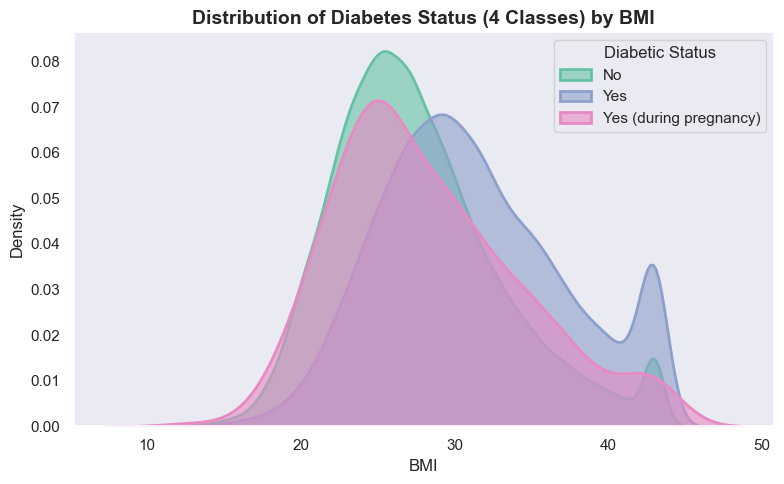

C:\Users\hp\AppData\Local\Temp\ipykernel_3556\1721703256.py:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['Diabetic'] == status], x=col, label=status, fill=True, common_norm=False, linewidth=2, alpha=0.6)


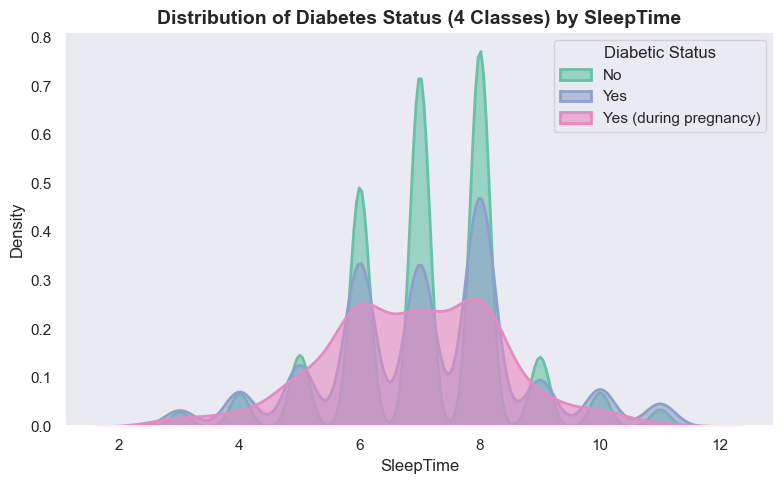

C:\Users\hp\AppData\Local\Temp\ipykernel_3556\1721703256.py:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['Diabetic'] == status], x=col, label=status, fill=True, common_norm=False, linewidth=2, alpha=0.6)


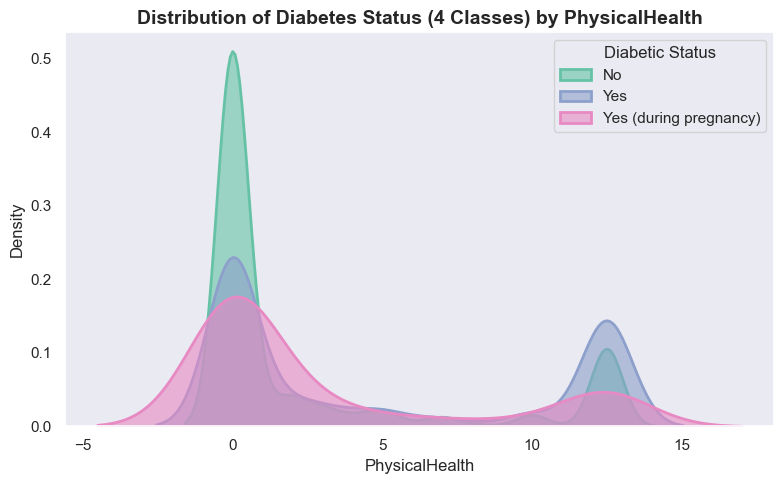

C:\Users\hp\AppData\Local\Temp\ipykernel_3556\1721703256.py:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['Diabetic'] == status], x=col, label=status, fill=True, common_norm=False, linewidth=2, alpha=0.6)


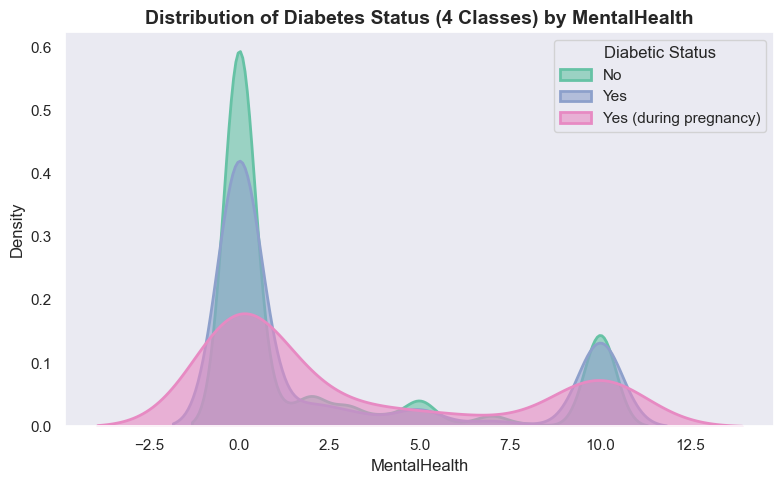

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical features related to diabetes
numerical_cols = ['BMI', 'SleepTime', 'PhysicalHealth', 'MentalHealth']

# Set the darkgrid style and a different color palette for better differentiation
sns.set_theme(style="darkgrid", palette="Set2")

# Plot for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 5))  # Create a new figure
    
    # Create the KDE plot for each of the 4 classes of diabetes
    for status in ['No', 'No Borderline Diabetes', 'Yes', 'Yes (during pregnancy)']:
        sns.kdeplot(df[df['Diabetic'] == status], x=col, label=status, fill=True, common_norm=False, linewidth=2, alpha=0.6)
    
    # Add title, x and y labels with adjusted font size
    plt.title(f'Distribution of Diabetes Status (4 Classes) by {col}', fontsize=14, fontweight='bold')  
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    
    # Add legend
    plt.legend(title="Diabetic Status")
    plt.grid(False)
    # Display the plot
    plt.tight_layout()
    plt.show()  # Show the plot


# Categorical Analysis

# 📊 Count Plots: Distribution of Diabetes Across Categorical Features  

This visualization presents **count plots** to analyze how **diabetes (Yes/No)** is distributed across various categorical features.  

### 🔹 Key Features:
- **Categorical Variables:** Sex, Smoking, Race, Age Category, Kidney Disease, Skin Cancer, Stroke, and Diabetic.
- **Visual Style:** White grid with the `RdPu` color palette for clarity.
- **Plot Interpretation:** Each bar represents the count of individuals in different categories, separated by diabetes status.

🚀 **Insight:** These visual patterns highlight key risk factors associated with diabetes.


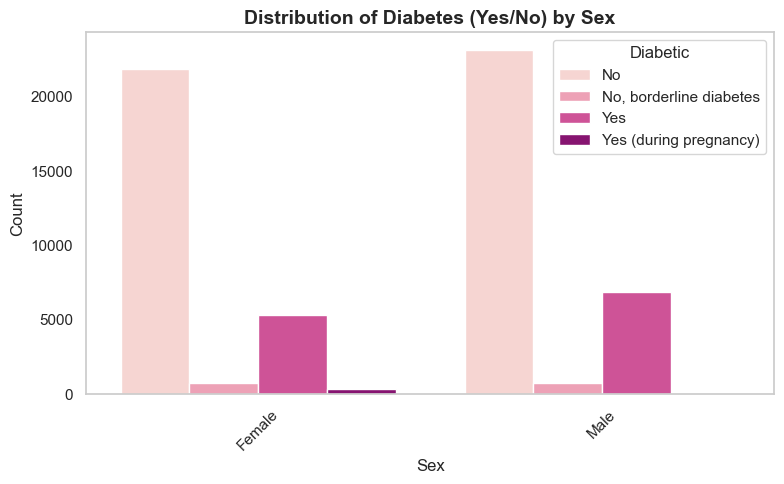

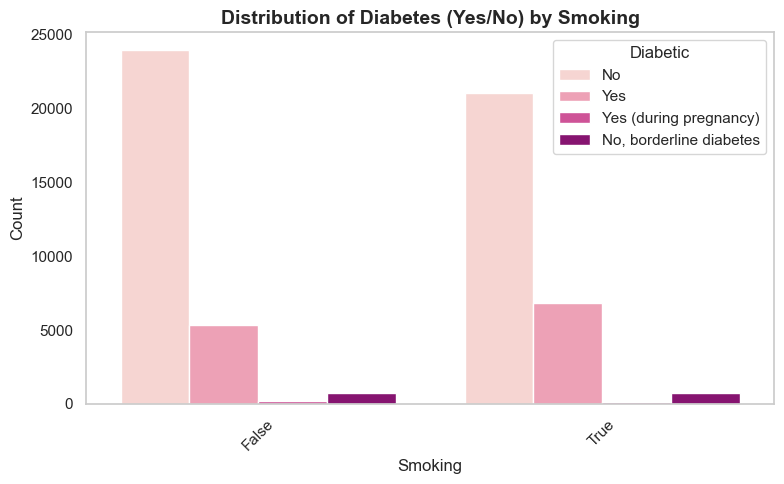

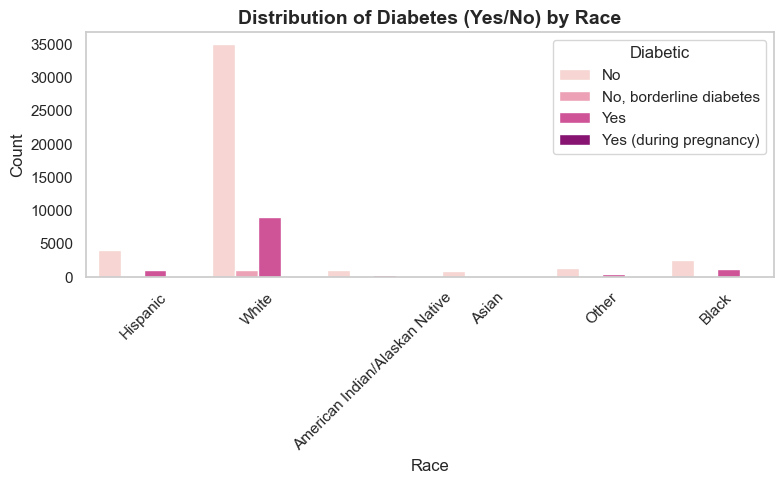

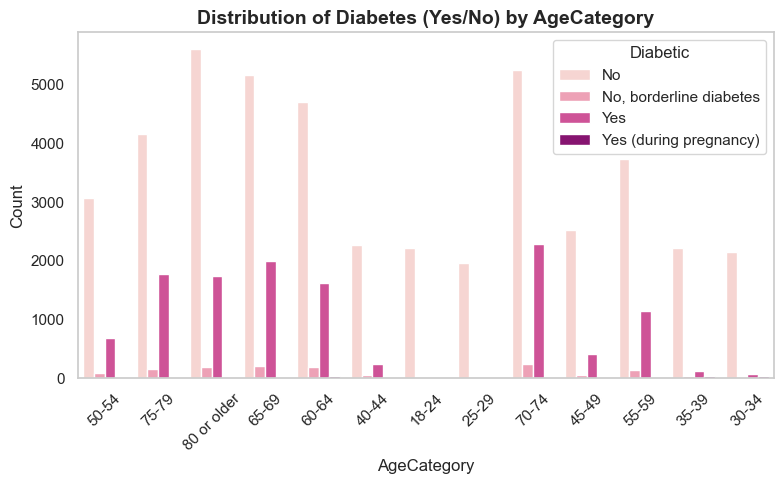

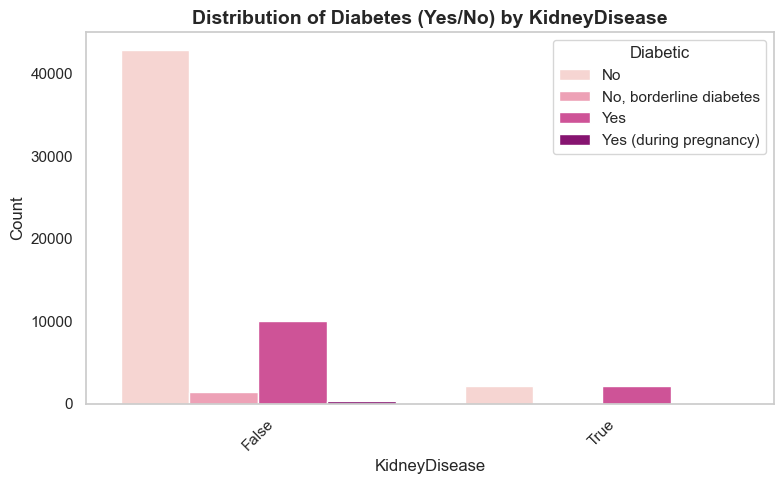

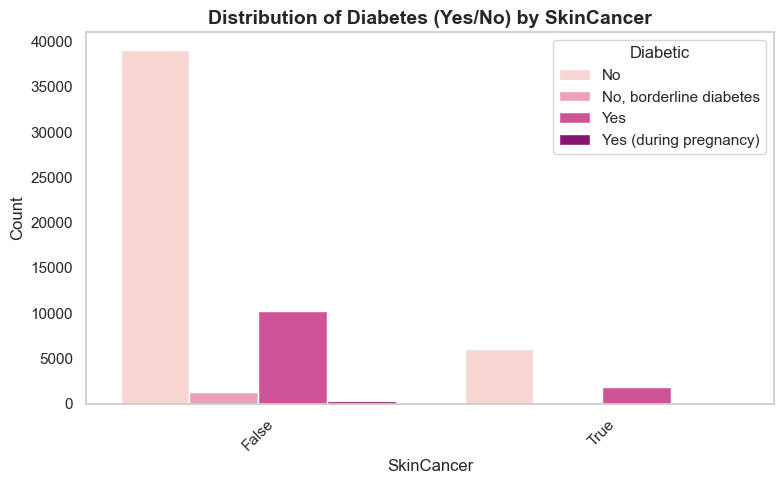

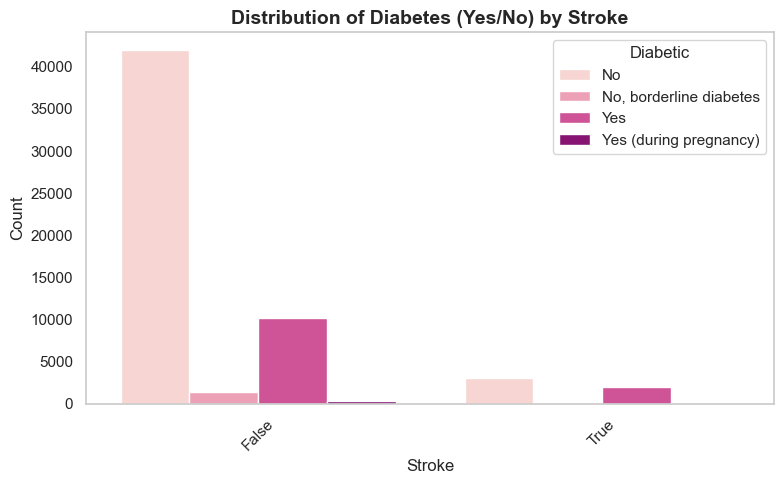

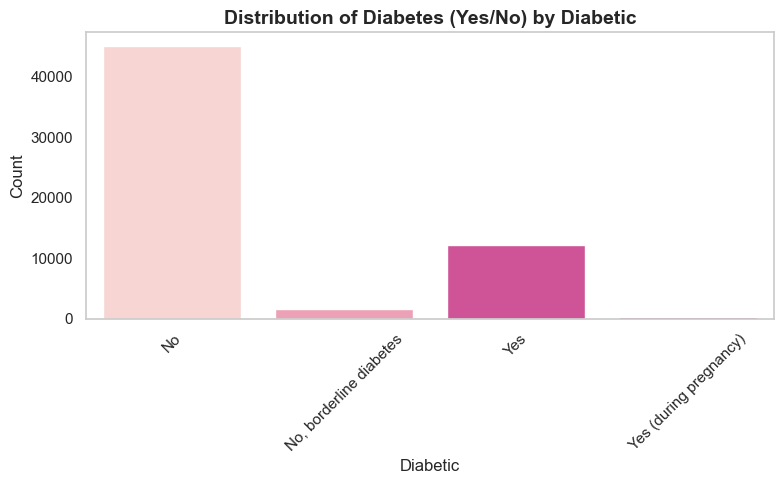

In [228]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns for diabetes-related analysis
categorical_cols = ['Sex', 'Smoking', 'Race', 'AgeCategory', 'KidneyDisease', 'SkinCancer', 'Stroke', 'Diabetic']

# Set the style and color palette
sns.set_theme(style="whitegrid", palette="RdPu")

# Plot for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(8, 5))  # Create a new figure
    
    # Create the count plot with hue='Diabetic' (Yes/No Diabetes)
    sns.countplot(x=col, hue='Diabetic', data=df, palette="RdPu")
    
    # Set the plot title and labels
    plt.title(f'Distribution of Diabetes (Yes/No) by {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    # Rotate x-axis labels for better readability if necessary
    plt.xticks(rotation=45)
    
    # Remove gridlines
    plt.grid(False)
    
    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Show the plot
    plt.show()


### Correlation Heatmap:
_Visualize correlations between numerical features using a heatmap_

<Axes: >

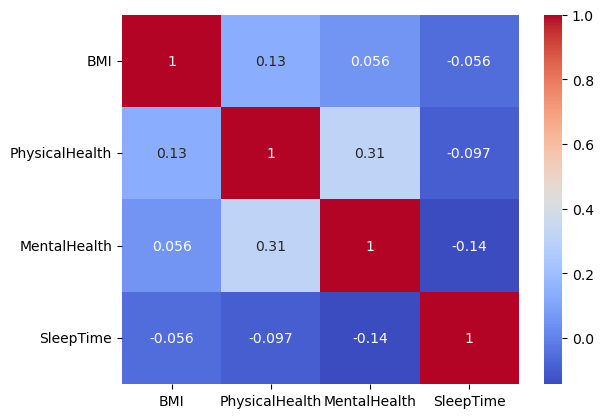

In [185]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


# Checking for Patterns and Anomalies
## Non-Graphical Analysis

In [186]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

## Graphical Analysis
_Missing Data Heatmap_
+ Visualize the missing data pattern with a heatmap

<Axes: >

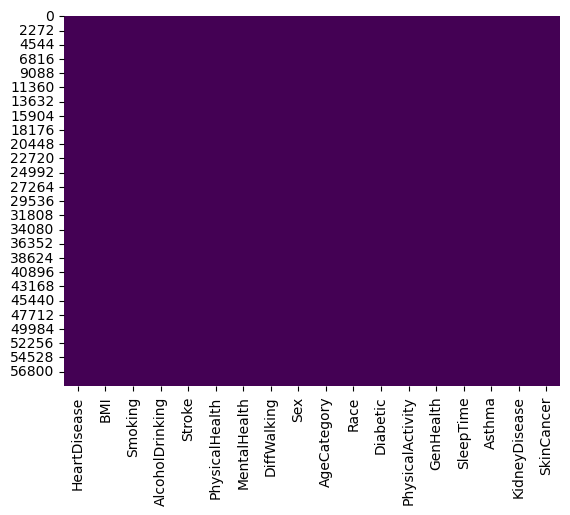

In [187]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')


## Detecting Multicollinearity
### Non-Graphical Analysis
_Correlation Coefficients_

+ Calculate the Pearson or Spearman correlation coefficients to identify highly correlated features.

<Axes: >

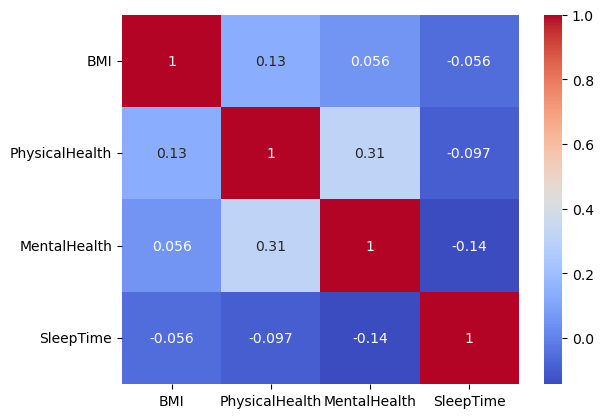

In [196]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


---
### Outliers based on Z-score

In [198]:
from scipy import stats

# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['number'])

# Calculate the Z-scores for all numeric features
z_scores = stats.zscore(numeric_df)

# Identify outliers where Z-score > 3 or Z-score < -3
df_outliers_zscore = numeric_df[(z_scores > 3) | (z_scores < -3)]

# Display the rows containing outliers based on Z-score
df_outliers_zscore


,BMI,PhysicalHealth,MentalHealth,SleepTime
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
59063,NaN,NaN,NaN,NaN
59064,NaN,NaN,NaN,NaN
59065,NaN,NaN,NaN,NaN
59066,NaN,NaN,NaN,NaN


### IQR-based outliers

In [200]:
# Iterate over each numeric feature and calculate IQR-based outliers
df_outliers_iqr = pd.DataFrame()  # To store all outliers

for column in numeric_df.columns:
    Q1 = numeric_df[column].quantile(0.25)
    Q3 = numeric_df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Identify outliers outside the range (Q1 - 1.5 * IQR) to (Q3 + 1.5 * IQR)
    outliers = numeric_df[(numeric_df[column] < (Q1 - 1.5 * IQR)) | 
                          (numeric_df[column] > (Q3 + 1.5 * IQR))]
    
    # Append to the outliers DataFrame
    df_outliers_iqr = pd.concat([df_outliers_iqr, outliers])

# Remove duplicates, if any
df_outliers_iqr = df_outliers_iqr.drop_duplicates()

# Display the rows containing outliers based on IQR
df_outliers_iqr


,BMI,PhysicalHealth,MentalHealth,SleepTime


____
# Observations:
+ Majority non-diabetic: 76.27% of individuals are not diabetic.
+ Significant diabetes prevalence: 20.63% have diagnosed diabetes.
+ Minor risk for diabetes: 2.55% are at borderline diabetes.
+ Low gestational diabetes: Only 0.55% are diagnosed with diabetes during pregnancy.

High Class Imabalancing Detected 